# Predicting Match Winners
---

In [1]:
import pandas as pd

### Data Exploration
---

In [2]:
matches = pd.read_csv("matches2022_2024.csv")
matches.shape


# EPL - 38 matches played each season, 20 teams in each season data for 2 seasons
#So we should have 1520 matches but for some reason we are missing some

#We have some data from cups so lets drop those
EPL_matches = matches.drop(matches[matches["Comp"] != "Premier League"].index)
# EPL_matches.loc[EPL_matches["Season"] == 2023] = 2024 

EPL_matches.columns = map(str.lower, EPL_matches.columns)
EPL_matches.columns
#cols : 'Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
    #    'GF', 'GA', 'Opponent', 'xG_x', 'xGA', 'Poss', 'Attendance', 'Captain',
    #    'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'SoT%',
    #    'G/Sh', 'G/SoT', 'FK', 'PK', 'xG_y', 'Season', 'Name'],
    #   dtype='object

EPL_matches.drop(columns= "unnamed: 0")
#Investigate missing matches
# EPL_matches["Name"].value_counts() #How many matches for each team

#In the EPL teams are demoted (6 teams in 2 seasons, 3 each season), I know Liverpool is a good team and has not got relagated so why so little records?
# matches[matches["team"] == "Liverpool"] #Only include data for 2021, no 2022 datas

# EPL_matches["round"].value_counts() #Perfect data as data has been grabbed during off season when all games have been completed

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh,sot,sot%,g/sh,g/sot,fk,pk,xg_y,season,name
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,Burnley,...,17.0,8.0,47.1,0.18,0.38,0.0,0,1.9,2024,ManchesterCity
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,Newcastle Utd,...,14.0,4.0,28.6,0.07,0.25,0.0,0,1.0,2024,ManchesterCity
4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,Sheffield Utd,...,29.0,9.0,31.0,0.07,0.22,2.0,0,3.5,2024,ManchesterCity
5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,Fulham,...,6.0,4.0,66.7,0.67,1.00,0.0,1,2.2,2024,ManchesterCity
6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,West Ham,...,29.0,13.0,44.8,0.10,0.23,1.0,0,3.6,2024,ManchesterCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0,2,Aston Villa,...,9.0,3.0,33.3,0.00,0.00,0.0,0,0.5,2022,NorwichCity
2854,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0,4,West Ham,...,8.0,2.0,25.0,0.00,0.00,1.0,0,0.8,2022,NorwichCity
2855,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0,3,Leicester City,...,9.0,5.0,55.6,0.00,0.00,0.0,0,1.1,2022,NorwichCity
2856,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1,1,Wolves,...,11.0,2.0,18.2,0.09,0.50,0.0,0,1.1,2022,NorwichCity


### Data Cleaning

In [3]:

EPL_matches.dtypes #ML Algoriths only work with numeric data

#1 - Convert date to date-time
EPL_matches["date"] = pd.to_datetime(EPL_matches['date']) #Convert existing column to datetime

In [4]:
matches.dtypes

Unnamed: 0        int64
Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF               object
GA               object
Opponent         object
xG_x            float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee          object
Match Report     object
Notes            object
Sh              float64
SoT             float64
SoT%            float64
G/Sh            float64
G/SoT           float64
FK              float64
PK                int64
xG_y            float64
Season            int64
Name             object
dtype: object

### Creating predictoes for machine learning model (Basic model that we can build on)

In [6]:
EPL_matches["venue_code"] = EPL_matches["venue"].astype("category").cat.codes  #Converts to catagorical var, then convert catagories into numbers
EPL_matches

,unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,sot,sot%,g/sh,g/sot,fk,pk,xg_y,season,name,venue_code
1,1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3,0,...,8.0,47.1,0.18,0.38,0.0,0,1.9,2024,ManchesterCity,0
3,3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1,0,...,4.0,28.6,0.07,0.25,0.0,0,1.0,2024,ManchesterCity,1
4,4,2023-08-27,14:00,Premier League,Matchweek 3,Sun,Away,W,2,1,...,9.0,31.0,0.07,0.22,2.0,0,3.5,2024,ManchesterCity,0
5,5,2023-09-02,15:00,Premier League,Matchweek 4,Sat,Home,W,5,1,...,4.0,66.7,0.67,1.00,0.0,1,2.2,2024,ManchesterCity,1
6,6,2023-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,3,1,...,13.0,44.8,0.10,0.23,1.0,0,3.6,2024,ManchesterCity,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,38,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0,2,...,3.0,33.3,0.00,0.00,0.0,0,0.5,2022,NorwichCity,0
2854,39,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0,4,...,2.0,25.0,0.00,0.00,1.0,0,0.8,2022,NorwichCity,1
2855,40,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0,3,...,5.0,55.6,0.00,0.00,0.0,0,1.1,2022,NorwichCity,0
2856,41,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1,1,...,2.0,18.2,0.09,0.50,0.0,0,1.1,2022,NorwichCity,0


In [7]:
EPL_matches["opp_code"] = EPL_matches["opponent"].astype("category").cat.codes #Each opponent has unique value

In [8]:
EPL_matches["hour"] = EPL_matches["time"].str.replace(":.+","", regex = True).astype("int")

In [9]:
EPL_matches["day_code"] = EPL_matches["date"].dt.dayofweek


### Setup target variable

In [10]:
#Target is whether or not team wins, for now we just want to predict WINS

EPL_matches["target"] = (EPL_matches["result"] == "W").astype("int") 

### Create the basic model
---

In [11]:
from sklearn.ensemble import RandomForestClassifier


In [12]:
rf = RandomForestClassifier(n_estimators= 50, min_samples_split =10, random_state=1)

#n_estimators - max amount of trees
#min_samples_split - number of sample in a leaf of decision tree before splitting node (overfit, accuracy trade off)

In [14]:
EPL_matches["date"].value_counts()

date
2022-05-22    20
2024-05-19    20
2023-05-28    20
2023-02-18    16
2021-09-11    16
              ..
2023-01-18     2
2023-02-08     2
2023-05-04     2
2023-05-25     2
2022-01-21     2
Name: count, Length: 360, dtype: int64

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,FK,PK,xG_y,Season,Name,venue_code,opp_code,hour,day_code,target


In [16]:
train = EPL_matches[EPL_matches["season"] != 2024]
test = EPL_matches[EPL_matches["season"] == 2024]




predictors = ["venue_code", "opp_code", "hour", "day_code"]

rf.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [183]:
train.shape
test.shape

(956, 35)

In [18]:
preds = rf.predict(test[predictors])

### Test Accuracy
---

In [19]:
from sklearn.metrics import accuracy_score

# accuracy_score : What % of time was your prediction actually accurate

acc = accuracy_score(test["target"], preds)

In [20]:
acc

0.625

In [21]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds, index = test.index))

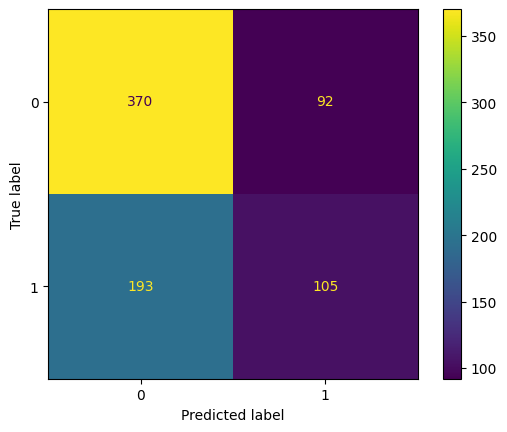

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


cm = confusion_matrix(test["target"], preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# pd.crosstab(index = combined["actual"], columns = combined["prediction"])



In [23]:
from sklearn.metrics import precision_score

#When we predicted win, how many times did they actually win

precision_score(test["target"], preds)

#0.4745762711864407 - When we predicted a win, the team only won 47% of the time

0.5329949238578681

### Improving the model
---

### Imporving precision with rolling averages

In [25]:
grouped_matches = EPL_matches.groupby("name") #Make one df for each team

group = grouped_matches.get_group("Arsenal")
group

,unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,fk,pk,xg_y,season,name,venue_code,opp_code,hour,day_code,target
58,1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2,1,...,0.0,0,0.8,2024,Arsenal,1,18,12,5,1
59,2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1,0,...,0.0,1,2.0,2024,Arsenal,0,7,20,0,1
60,3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2,2,...,0.0,1,3.2,2024,Arsenal,1,9,15,5,0
61,4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3,1,...,0.0,0,2.3,2024,Arsenal,1,15,16,6,1
62,5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1,0,...,0.0,0,1.0,2024,Arsenal,0,8,16,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,40,2022-05-01,16:30,Premier League,Matchweek 35,Sun,Away,W,2,1,...,0.0,0,0.9,2022,Arsenal,0,23,16,6,1
2180,41,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,W,2,1,...,2.0,0,2.0,2022,Arsenal,1,10,14,6,1
2181,42,2022-05-12,19:45,Premier League,Matchweek 22,Thu,Away,L,0,3,...,0.0,0,0.5,2022,Arsenal,0,21,19,3,0
2182,43,2022-05-16,20:00,Premier League,Matchweek 37,Mon,Away,L,0,2,...,0.0,0,0.6,2022,Arsenal,0,16,20,0,0


In [29]:
def rolling_averages(group, cols, new_cols) : 
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3,closed="left").mean()
    #Important to put closed left to take out the current week
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols) #Drop na only for new cols, this removes only the first 3 matches
    return group


In [32]:
cols = ["gf", "ga", "sh", "sot", "fk" , "pk"]
new_cols = [f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'fk_rolling',
 'pk_rolling']

In [34]:
matches_rolling = EPL_matches.groupby("name").apply(lambda x: rolling_averages(x,cols,new_cols))

matches_rolling = matches_rolling.droplevel("name")

matches_rolling

,unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,opp_code,hour,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,fk_rolling,pk_rolling
2143,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,1,0,...,17,15,5,1,0.000000,3.000000,9.666667,2.333333,0.333333,0.000000
2144,5,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Away,W,1,0,...,5,15,5,1,0.333333,2.333333,12.333333,3.000000,0.333333,0.000000
2146,7,2021-09-26,16:30,Premier League,Matchweek 6,Sun,Home,W,3,1,...,21,16,6,1,0.666667,1.666667,14.666667,3.000000,0.666667,0.000000
2147,8,2021-10-02,17:30,Premier League,Matchweek 7,Sat,Away,D,0,0,...,4,17,5,0,1.666667,0.333333,18.333333,5.333333,0.666667,0.000000
2148,9,2021-10-18,20:00,Premier League,Matchweek 8,Mon,Home,D,2,2,...,7,20,0,0,1.333333,0.333333,11.000000,4.000000,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,40,2024-04-24,19:45,Premier League,Matchweek 29,Wed,Home,L,0,1,...,2,19,2,0,1.000000,2.000000,9.666667,4.000000,0.333333,0.333333
694,41,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,W,2,1,...,13,15,5,1,0.666667,1.666667,10.333333,3.333333,0.000000,0.000000
695,42,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Away,L,1,5,...,14,17,5,0,0.666667,1.333333,11.000000,4.000000,0.000000,0.000000
696,43,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,L,1,3,...,7,15,5,0,1.000000,2.333333,10.000000,3.333333,0.000000,0.000000


In [44]:
matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,opp_code,hour,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,fk_rolling,pk_rolling
0,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Home,W,1,0,...,17,15,5,1,0.000000,3.000000,9.666667,2.333333,0.333333,0.000000
1,5,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Away,W,1,0,...,5,15,5,1,0.333333,2.333333,12.333333,3.000000,0.333333,0.000000
2,7,2021-09-26,16:30,Premier League,Matchweek 6,Sun,Home,W,3,1,...,21,16,6,1,0.666667,1.666667,14.666667,3.000000,0.666667,0.000000
3,8,2021-10-02,17:30,Premier League,Matchweek 7,Sat,Away,D,0,0,...,4,17,5,0,1.666667,0.333333,18.333333,5.333333,0.666667,0.000000
4,9,2021-10-18,20:00,Premier League,Matchweek 8,Mon,Home,D,2,2,...,7,20,0,0,1.333333,0.333333,11.000000,4.000000,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,40,2024-04-24,19:45,Premier League,Matchweek 29,Wed,Home,L,0,1,...,2,19,2,0,1.000000,2.000000,9.666667,4.000000,0.333333,0.333333
2201,41,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,W,2,1,...,13,15,5,1,0.666667,1.666667,10.333333,3.333333,0.000000,0.000000
2202,42,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Away,L,1,5,...,14,17,5,0,0.666667,1.333333,11.000000,4.000000,0.000000,0.000000
2203,43,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,L,1,3,...,7,15,5,0,1.000000,2.333333,10.000000,3.333333,0.000000,0.000000


### Retraining Our Model

In [50]:
def make_predictions(data, predictors):
    train = data[data["season"] != 2024] #Higher precision when we go by season and not by date
    test = data[data["season"] == 2024]

    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], prediction=preds, index = test.index))
    precision = precision_score(test["target"], preds)
    return combined, precision, preds, test["target"]


In [51]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]
predictors = predictors + new_cols

combined, precision, preds, test_target = make_predictions(matches_rolling, predictors)

In [52]:
precision 
#Precision now 0.625

0.5520361990950227

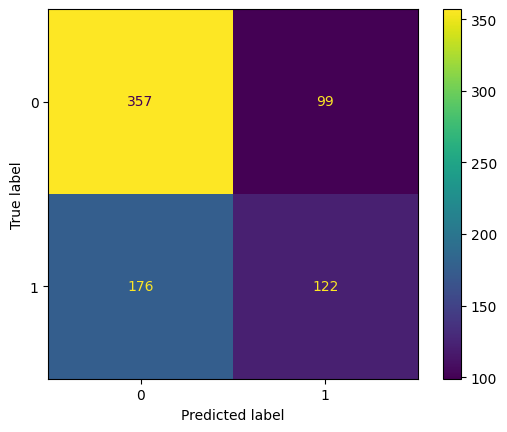

In [53]:
cm = confusion_matrix(test_target, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# pd.crosstab(index = combined["actual"], columns = combined["prediction"])



### Feature Importance Analysis
---

In [54]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.005 seconds


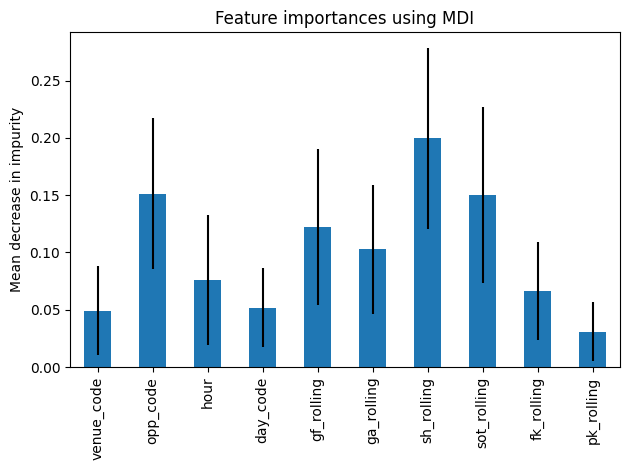

In [41]:
forest_importances = pd.Series(importances, index=predictors)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Notice that shooting rolling and opp_code has big influence

In [56]:
combined = combined.merge(matches_rolling[["date", "name", "opponent", "result"]], left_index = True, right_index = True)

In [57]:
combined


,actual,prediction,index,date,name,opponent,result
73,1,1,73,2023-08-12,Arsenal,Nott'ham Forest,W
74,1,0,74,2023-08-21,Arsenal,Crystal Palace,W
75,0,1,75,2023-08-26,Arsenal,Fulham,D
76,1,1,76,2023-09-03,Arsenal,Manchester Utd,W
77,1,1,77,2023-09-17,Arsenal,Everton,W
...,...,...,...,...,...,...,...
2200,0,0,2200,2024-04-24,WolverhamptonWanderers,Bournemouth,L
2201,1,0,2201,2024-04-27,WolverhamptonWanderers,Luton Town,W
2202,0,0,2202,2024-05-04,WolverhamptonWanderers,Manchester City,L
2203,0,0,2203,2024-05-11,WolverhamptonWanderers,Crystal Palace,L


### Calculate Points

In [102]:
combined["predicted_points"] = combined["prediction"].apply(lambda x: 3 if x == 1 else 0)
combined["actual_points"] = combined["prediction"].apply(lambda x: 3 if x == 1 else 0)

groups = combined.groupby("team")

In [105]:
groups
group = groups.get_group("Arsenal")
group

,actual,prediction,index,date,team,opponent,result,predicted_points,actual_points
55,0,0,55,2022-01-23,Arsenal,Burnley,D,0,0
56,1,0,56,2022-02-10,Arsenal,Wolves,W,0,0
57,1,0,57,2022-02-19,Arsenal,Brentford,W,0,0
58,1,1,58,2022-02-24,Arsenal,Wolves,W,3,3
59,1,1,59,2022-03-06,Arsenal,Watford,W,3,3
60,1,1,60,2022-03-13,Arsenal,Leicester City,W,3,3
61,0,1,61,2022-03-16,Arsenal,Liverpool,L,3,3
62,1,0,62,2022-03-19,Arsenal,Aston Villa,W,0,0
63,0,0,63,2022-04-04,Arsenal,Crystal Palace,L,0,0
64,0,0,64,2022-04-09,Arsenal,Brighton,L,0,0


### Comparing Home/Away predictions

In [ ]:
#Our model may have made different predictions for the same match - Eg Arsenal Burnely

In [58]:
class MissingDict(dict): #Inherits from dictionary class
    __missing__= lambda self, key: key #Override default functionality of missing keys in python dictionary

map_values = {
    "Brighton and Hove Albion" : "Brighton",
    "Manchester United" : "Manchester Utd",
    "Newcastle United" : "Newcastle Utd",
    "Tottenham Hotspur" : "Tottenham",
    "West Ham United"  : "West Ham",
    "Wolverhamption Wanderes" : "Wolves"
}

mapping = MissingDict(**map_values)

mapping["Wolverhamption Wanderes"]


'Wolves'

In [59]:
combined["new_team"] = combined["name"].map(mapping)
combined

,actual,prediction,index,date,name,opponent,result,new_team
73,1,1,73,2023-08-12,Arsenal,Nott'ham Forest,W,Arsenal
74,1,0,74,2023-08-21,Arsenal,Crystal Palace,W,Arsenal
75,0,1,75,2023-08-26,Arsenal,Fulham,D,Arsenal
76,1,1,76,2023-09-03,Arsenal,Manchester Utd,W,Arsenal
77,1,1,77,2023-09-17,Arsenal,Everton,W,Arsenal
...,...,...,...,...,...,...,...,...
2200,0,0,2200,2024-04-24,WolverhamptonWanderers,Bournemouth,L,WolverhamptonWanderers
2201,1,0,2201,2024-04-27,WolverhamptonWanderers,Luton Town,W,WolverhamptonWanderers
2202,0,0,2202,2024-05-04,WolverhamptonWanderers,Manchester City,L,WolverhamptonWanderers
2203,0,0,2203,2024-05-11,WolverhamptonWanderers,Crystal Palace,L,WolverhamptonWanderers


In [60]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"]) #Merge the two predictions to see if the same thing got predicted
merged

,actual_x,prediction_x,index_x,date,name_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,index_y,name_y,opponent_y,result_y,new_team_y
0,1,1,73,2023-08-12,Arsenal,Nott'ham Forest,W,Arsenal,0,0,1691,NottinghamForest,Arsenal,L,NottinghamForest
1,1,0,74,2023-08-21,Arsenal,Crystal Palace,W,Arsenal,0,1,775,CrystalPalace,Arsenal,L,CrystalPalace
2,0,1,75,2023-08-26,Arsenal,Fulham,D,Arsenal,0,0,960,Fulham,Arsenal,D,Fulham
3,1,1,76,2023-09-03,Arsenal,Manchester Utd,W,Arsenal,0,0,1475,ManchesterUnited,Arsenal,L,ManchesterUnited
4,1,1,77,2023-09-17,Arsenal,Everton,W,Arsenal,0,0,889,Everton,Arsenal,L,Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,1248,2024-04-24,Liverpool,Everton,L,Liverpool,1,0,918,Everton,Liverpool,W,Everton
299,0,1,1249,2024-04-27,Liverpool,West Ham,D,Liverpool,0,0,2090,WestHamUnited,Liverpool,D,WestHamUnited
300,1,1,1250,2024-05-05,Liverpool,Tottenham,W,Liverpool,0,0,1944,TottenhamHotspur,Liverpool,L,TottenhamHotspur
301,0,1,1251,2024-05-13,Liverpool,Aston Villa,D,Liverpool,0,0,220,AstonVilla,Liverpool,D,AstonVilla


In [65]:
# Look at just the rows where one team won and the other lost, these are the rows that have more confidence

merged[(merged["prediction_x"] == 1) & (merged["prediction_y" ] == 0 )]["actual_x"].value_counts()



actual_x
1    57
0    42
Name: count, dtype: int64

## Recap and Next Steps

In [ ]:
### Next Steps

# 1) Only have 2 seasons of data, could have 10 seasons of data
# 2) Use more of the columns 
# 3) Use other algorithms that have non linear relationships
# 4) Get records of teams and use as a feature
# 5) Did the teams play in any other competitions, if so were they tired?